In [1]:
from pyEmceeFit import *

In [3]:
sampler,pos,prob,state,flat_samples = main(True,False)

running with 4 threads
running burn-in


 10%|█         | 1/10 [06:30<58:30, 390.05s/it]

emcee: Exception while calling your likelihood function:
emcee: Exception while calling your likelihood function:  params:emcee: Exception while calling your likelihood function:
 
  params:

KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys,math

font = {'family' : 'DejaVu Serif',
    'weight' : 'normal',
    'size'   : 16}
plt.rc('font', **font) #set all plot attribute defaults

def pltFormatter(fig,axList,**kwargs):
    for ax in axList:
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        legend=kwargs.get("legend")
        if legend != None:
            legend.get_frame().set_edgecolor('black') 

def trackPercent(place,totalLength,strLen): #percent output tracker
    percent = place/totalLength*100
    if math.floor(percent)==69:
        string="{:.2f} % complete -- nice".format(percent)
    else:
        string="{:.2f} % complete".format(percent)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

In [39]:
SummitResults = readPickle('pyEmceeVar.p')
flat_samples,pos,prob = SummitResults

In [40]:
 for θ in flat_samples[np.random.randint(len(flat_samples), size=10)]:
        print("i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}".format(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6]))

i = 35.29, rMin = 717.00, MFac = 0.07, rFac = 0.86, f1 (sin^2) = 0.13, f2 (cos^2) = 0.92, f3 (sin*cos)= 0.66
i = 34.99, rMin = 1117.02, MFac = 0.10, rFac = 1.16, f1 (sin^2) = 0.54, f2 (cos^2) = 0.72, f3 (sin*cos)= 0.66
i = 44.31, rMin = 1292.18, MFac = 0.14, rFac = 0.31, f1 (sin^2) = 0.39, f2 (cos^2) = 0.18, f3 (sin*cos)= 0.08
i = 14.80, rMin = 2726.68, MFac = 13.16, rFac = 0.00, f1 (sin^2) = 0.15, f2 (cos^2) = 0.76, f3 (sin*cos)= 0.42
i = 15.62, rMin = 2614.23, MFac = 1.56, rFac = 0.02, f1 (sin^2) = 0.78, f2 (cos^2) = 0.23, f3 (sin*cos)= 0.97
i = 28.95, rMin = 1387.32, MFac = 8.74, rFac = 0.00, f1 (sin^2) = 0.08, f2 (cos^2) = 0.69, f3 (sin*cos)= 0.39
i = 13.88, rMin = 1382.72, MFac = 1.84, rFac = 0.04, f1 (sin^2) = 0.64, f2 (cos^2) = 0.65, f3 (sin*cos)= 0.97
i = 39.65, rMin = 519.56, MFac = 1.76, rFac = 0.12, f1 (sin^2) = 0.46, f2 (cos^2) = 0.68, f3 (sin*cos)= 0.42
i = 51.68, rMin = 1090.10, MFac = 0.47, rFac = 0.08, f1 (sin^2) = 0.70, f2 (cos^2) = 0.73, f3 (sin*cos)= 0.14
i = 17.80, 

In [4]:
def plotParams(data,θList,mα=0.1):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axd = plt.subplot_mosaic([['a','b','c']],figsize=(24,6))
    ax1 = axd["a"]; ax2 = axd["b"]; ax3 = axd["c"]
    ax1.get_shared_x_axes().join(ax1,ax2); ax1.get_shared_x_axes().join(ax1,ax3)
    ax2.get_shared_y_axes().join(ax2,ax3); ax3.set_yticklabels([])
    dodgerBlue=(.12,0.56,1.00)
    ax1.errorbar(ν,data[3],yerr=data[6],marker="o",ms=3,label="3C 273",markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax2.errorbar(ν,np.mean(np.array(data[4])[indx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=3,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax3.errorbar(ν,np.mean(np.array(data[4])[oindx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=3,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax1.fill_between(ν,data[3]-data[6],data[3]+data[6],color=dodgerBlue,alpha=0.5)
    ax2.fill_between(ν,np.mean(np.array(data[4])[indx],axis=0)-0.07,np.mean(np.array(data[4])[indx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    ax3.fill_between(ν,np.mean(np.array(data[4])[oindx],axis=0)-0.07,np.mean(np.array(data[4])[oindx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    strLen = 0; place = 1; N = len(θList)
    for θ in θList:
        i,rMin,Mfac,rFac,f1,f2,f3,pa = θ
        line,phaseList = getProfiles(ν,θ,data)
        phase = np.mean(np.array(phaseList)[indx],axis=0); phaseo = np.mean(np.array(phaseList)[oindx],axis=0)
        label = "Disk wind model ({} samples)".format(N) if place == 1 else ""
        ax1.plot(ν,line,label=label,lw=2,c='crimson',alpha=mα)
        ax2.plot(ν,phase,label=label,lw=2,c='crimson',alpha=mα)
        ax3.plot(ν,phaseo,label=label,lw=2,c='crimson',alpha=mα)
        strLen = trackPercent(place,N,strLen); place+=1
    ax1.set_title("Line profile comparison")
    ax2.set_title("Phase profile (mean on) comparison")
    ax3.set_title("Phase profile (mean off) comparison")
    ax2.set_xlabel("Velocity [km/s]")
    ax1.set_ylabel("Flux [fraction of max]")
    ax2.set_ylabel("Phase [deg]")
    l = ax2.legend(loc='upper left')
    pltFormatter(fig,[ax1,ax2,ax3],legend=l)
    fig.tight_layout()
    return fig,ax1,ax2,ax3

def plotPhases(data,θList,mα=0.1):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axs = plt.subplots(nrows=8,ncols=3,figsize=(12,40),sharex=True,sharey=True)
    place = 0; strLen = 0; N = len(θList)
    for θ in θList:
        i,rMin,Mfac,rFac,f1,f2,f3,pa = θ
        line,phaseList = getProfiles(ν,θ,data)
        ind = 0
        for ax in axs.reshape(-1):
            onoff = "on" if ind in indx else "off"
            ax.errorbar(ν,data[4][ind],yerr=data[5][ind],marker="o",ms=3,markerfacecolor="dodgerblue",markeredgecolor="dodgerblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
            ax.fill_between(ν,data[4][ind]-data[5][ind],data[4][ind]+data[5][ind],color="dodgerblue",alpha=0.5)
            ax.plot(ν,phaseList[ind],lw=2,c="crimson",alpha=mα)
            ax.set_title("index = {0} ({1})".format(ind,onoff))
            ax.set_xlabel("velocity [km/s]"); ax.set_ylabel("phase [deg]")
            ind += 1
        strLen = trackPercent(place,N,strLen)
    return fig,axs
        

-731.6043209473231
100.00 % complete

(<Figure size 1728x432 with 3 Axes>,
 <AxesSubplot:label='a', title={'center':'Line profile comparison'}, ylabel='Flux [fraction of max]'>,
 <AxesSubplot:label='b', title={'center':'Phase profile (mean on) comparison'}, xlabel='Velocity [km/s]', ylabel='Phase [deg]'>,
 <AxesSubplot:label='c', title={'center':'Phase profile (mean off) comparison'}>)

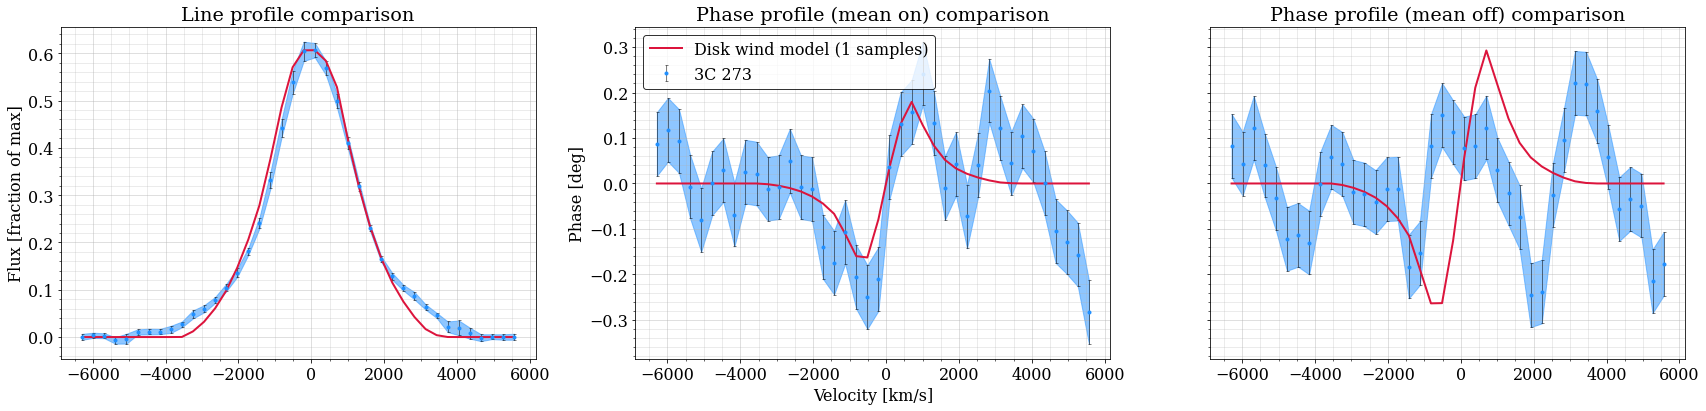

In [9]:
#making a guess at what it should be
θ = [30.,1e3,1.1,1.,0.57,0.6,0.46,90.] #i,rMin,Mfac,rFac,f1,f2,f3,pa -- 30.,1e3,1.1,1.,0.57,0.6,0.46,342. is a good guess
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5
print(log_prob(θ,vel,data))
plotParams(data,[θ],1)

0.00 % complete

(<Figure size 864x2880 with 24 Axes>,
 array([[<AxesSubplot:title={'center':'index = 0 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 1 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 2 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>],
        [<AxesSubplot:title={'center':'index = 3 (off)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 4 (off)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 5 (off)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>],
        [<AxesSubplot:title={'center':'index = 6 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 7 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>,
         <AxesSubplot:title={'center':'index = 8 (on)'}, xlabel='velocity [km/s]', ylabel='phase [deg]'>],
  

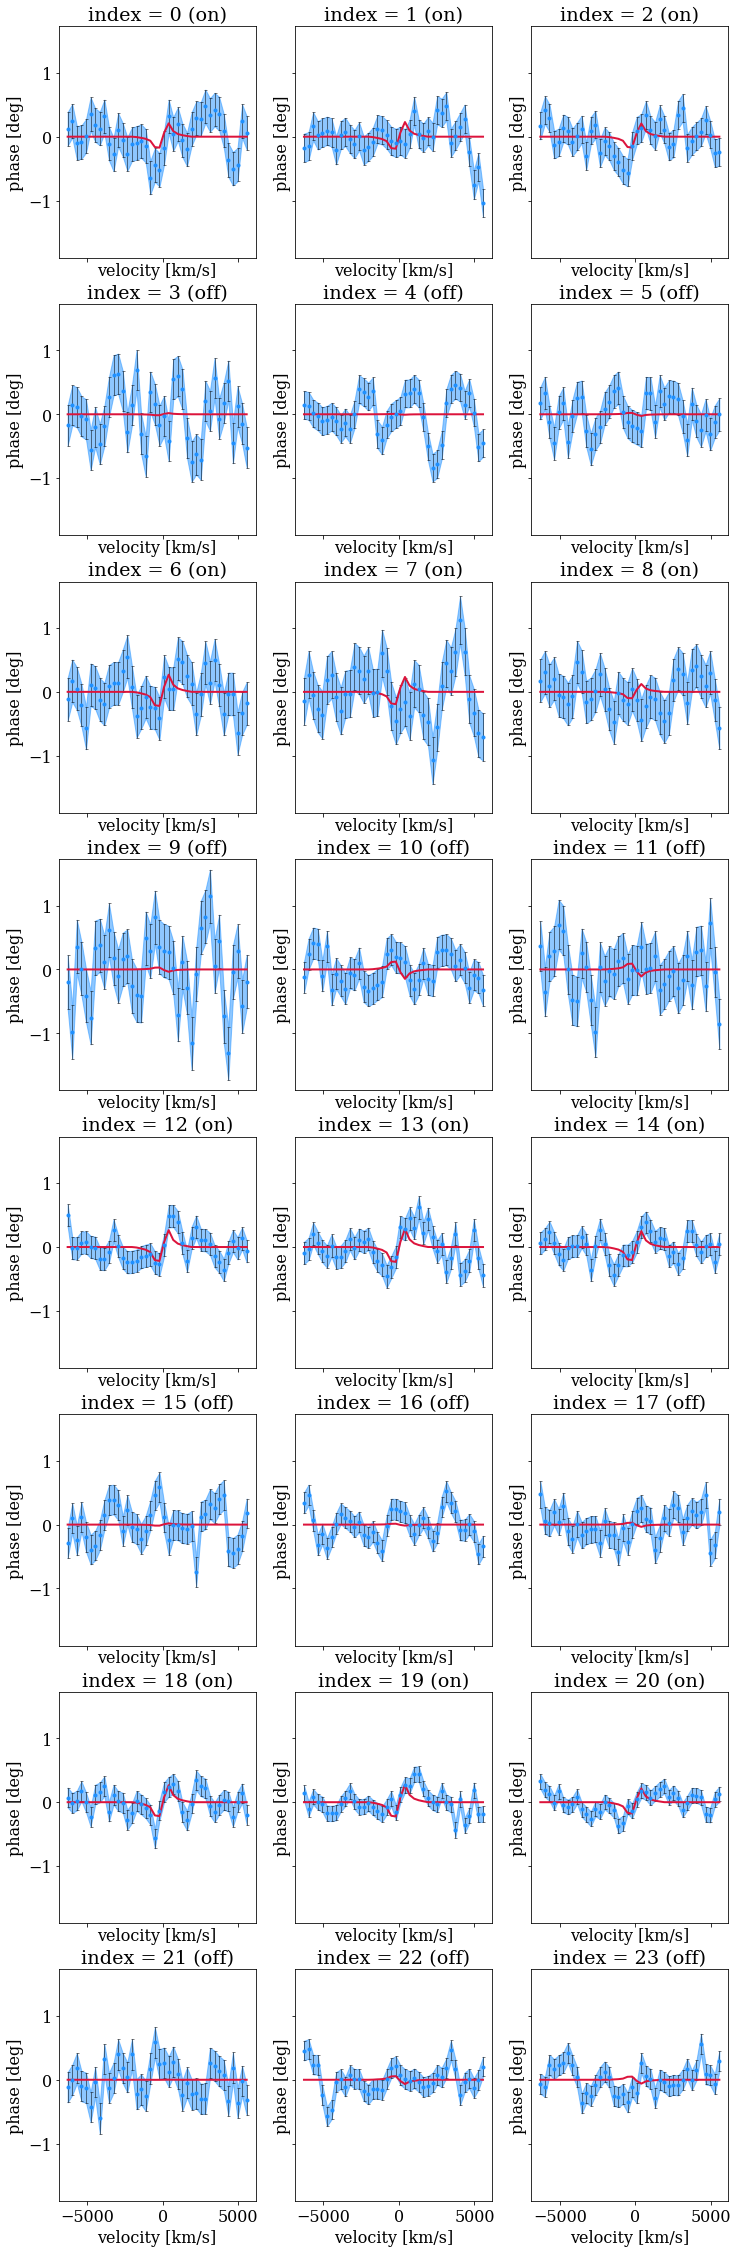

In [38]:
plotPhases(data,[θ],1)

100.00 % complete       

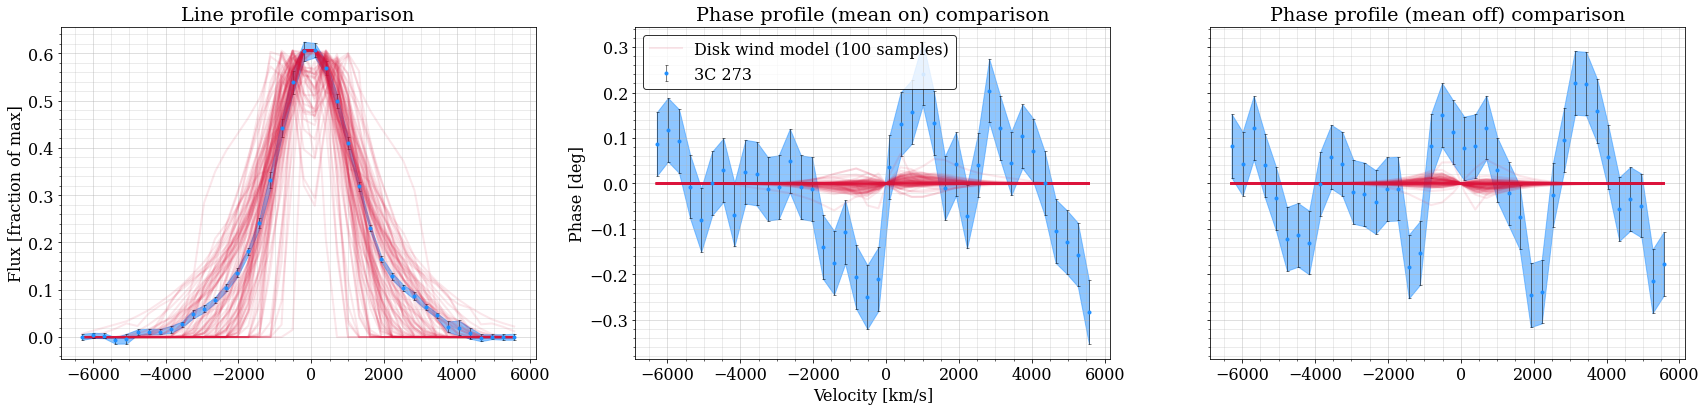

In [41]:
θList = flat_samples[np.random.randint(len(flat_samples),size=100)] #this looks like nonsense, investigate further
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
fig,ax1,ax2,ax3 = plotParams(data,θList)

In [42]:
from IPython.display import display, Math
labels=["i","rMin","MFac","rFac","f1","f2","f3","PA"]
for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
prob == -np.Inf

In [45]:
indx=[0,1,2,6,7,8,12,13,14,18,19,20]
t = [1 if i in indx else 0 for i in range(24)]

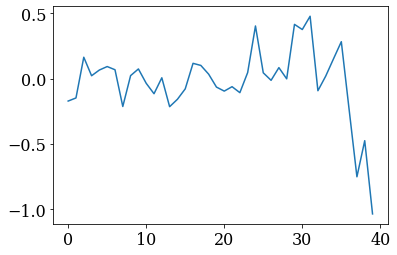

In [48]:
plt.plot(data[4][1])